# XGBoost Algorithm



In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import set_printoptions

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Seleção de Atributos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## PPI Dataset 

In [2]:
df_ppi = pd.read_csv('proteins_features_cerevisiae.csv')
df_ppi

,Protein_key,DegreeCentrality,EigenvectorCentrality,BetweennessCentrality,ClosenessCentrality,Clustering,is_essential
0,4932.YBR182C,0.059909,0.009397,1.233359e-04,0.499687,0.313084,0
1,4932.YMR158W,0.090568,0.023854,7.005906e-05,0.506416,0.479887,0
2,4932.YKL023W,0.008603,0.001296,1.071163e-05,0.462122,0.236364,0
3,4932.YLR054C,0.006257,0.000445,7.120056e-06,0.443589,0.289744,0
4,4932.YGL216W,0.083060,0.012795,2.988854e-04,0.506938,0.273937,0
...,...,...,...,...,...,...,...
6389,4932.YMR010W,0.020648,0.002403,4.499981e-05,0.475918,0.193847,0
6390,4932.YMR026C,0.043172,0.005179,1.245902e-04,0.491845,0.181686,0
6391,4932.YMR244W,0.002972,0.000226,3.814570e-07,0.395925,0.233918,0
6392,4932.YDL113C,0.041764,0.004499,8.969398e-05,0.486937,0.242178,0


In [3]:
df_ppi['Locus'] = df_ppi.apply(lambda x:x.Protein_key[5::], axis=1)

In [4]:
df_ppi

,Protein_key,DegreeCentrality,EigenvectorCentrality,BetweennessCentrality,ClosenessCentrality,Clustering,is_essential,Locus
0,4932.YBR182C,0.059909,0.009397,1.233359e-04,0.499687,0.313084,0,YBR182C
1,4932.YMR158W,0.090568,0.023854,7.005906e-05,0.506416,0.479887,0,YMR158W
2,4932.YKL023W,0.008603,0.001296,1.071163e-05,0.462122,0.236364,0,YKL023W
3,4932.YLR054C,0.006257,0.000445,7.120056e-06,0.443589,0.289744,0,YLR054C
4,4932.YGL216W,0.083060,0.012795,2.988854e-04,0.506938,0.273937,0,YGL216W
...,...,...,...,...,...,...,...,...
6389,4932.YMR010W,0.020648,0.002403,4.499981e-05,0.475918,0.193847,0,YMR010W
6390,4932.YMR026C,0.043172,0.005179,1.245902e-04,0.491845,0.181686,0,YMR026C
6391,4932.YMR244W,0.002972,0.000226,3.814570e-07,0.395925,0.233918,0,YMR244W
6392,4932.YDL113C,0.041764,0.004499,8.969398e-05,0.486937,0.242178,0,YDL113C


In [5]:
# fix random seed for reproducibility
seed = 7

In [6]:
df_seq = pd.read_csv('feature_sequences.csv')
df_seq

,Locus,Sequence,Sequence_Length,Molecular_weight,Gravy,Aromaticity,Sec_Struct_Helix,Sec_Struct_Turn,Sec_Struct_Sheet,Percent_A,...,Percent_M,Percent_N,Percent_P,Percent_Q,Percent_R,Percent_S,Percent_T,Percent_V,Percent_W,Percent_Y
0,YPL071C,MSSRFARSNGNPNHIRKRNHSPDPIGIDNYKRKRLIIDLENLSLND...,156,18434.5023,-0.900641,0.096154,0.288462,0.211538,0.185897,0.044872,...,0.032051,0.089744,0.025641,0.012821,0.064103,0.057692,0.038462,0.038462,0.032051,0.038462
1,YLL050C,MSRSGVAVADESLTAFNDLKLGKKYKFILFGLNDAKTEIVVKETST...,143,15900.5720,-0.379720,0.111888,0.307692,0.244755,0.237762,0.076923,...,0.013986,0.041958,0.027972,0.006993,0.048951,0.111888,0.055944,0.083916,0.006993,0.048951
2,YMR172W,MSGMGIAILCIVRTKIYRITISFDYSTLMSPFFLFLMMPTTLKDGY...,719,79414.9726,-0.801808,0.043115,0.219750,0.326843,0.214186,0.055633,...,0.026426,0.118220,0.043115,0.050070,0.050070,0.112656,0.083449,0.030598,0.004172,0.018081
3,YOR185C,MSAPAQNNAEVPTFKLVLVGDGGTGKTTFVKRHLTGEFEKKYIATI...,220,24990.2165,-0.383636,0.109091,0.318182,0.195455,0.236364,0.077273,...,0.018182,0.054545,0.054545,0.050000,0.036364,0.027273,0.059091,0.081818,0.013636,0.040909
4,YLL032C,MDNFKIYSTVITTAFLQVPHLYTTNRLWKPIEAPFLVEFLQKRISS...,825,94596.1505,-0.297939,0.100606,0.335758,0.244848,0.225455,0.042424,...,0.025455,0.084848,0.040000,0.046061,0.035152,0.081212,0.059394,0.043636,0.002424,0.043636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,YBR021W,MPDNLSLHLSGSSKRLNSRQLMESSNETFAPNNVDLEKEYKSSQSN...,633,71735.0271,0.235229,0.164297,0.391785,0.246445,0.227488,0.080569,...,0.023697,0.045814,0.041074,0.023697,0.033175,0.101106,0.039494,0.069510,0.034755,0.052133
6596,YDR320W-B,MRVLHVMLSFLNSLLFLPICFCLLQLKATCAVRVKKYSMKKKKKR,45,5328.7400,0.440000,0.088889,0.400000,0.111111,0.311111,0.044444,...,0.066667,0.022222,0.022222,0.022222,0.066667,0.066667,0.022222,0.088889,0.000000,0.022222
6597,YBR232C,MFILAEVSDFILDIVAPLCPTISEACLTKHSIRKCTSEGTLSGESW...,119,12749.5491,0.688235,0.075630,0.386555,0.252101,0.268908,0.067227,...,0.008403,0.008403,0.025210,0.000000,0.033613,0.176471,0.067227,0.100840,0.016807,0.000000
6598,YDL245C,MASEQSSPEINADNLNSSAADVHVQPPGEKEWSDGFYDKEVINGNT...,567,62930.7446,0.357319,0.142857,0.391534,0.248677,0.238095,0.068783,...,0.028219,0.033510,0.042328,0.024691,0.029982,0.081129,0.045855,0.081129,0.022928,0.045855


### Merge de Datasets

In [7]:
df = df_seq.merge(df_ppi, how='inner', on='Locus')
df

,Locus,Sequence,Sequence_Length,Molecular_weight,Gravy,Aromaticity,Sec_Struct_Helix,Sec_Struct_Turn,Sec_Struct_Sheet,Percent_A,...,Percent_V,Percent_W,Percent_Y,Protein_key,DegreeCentrality,EigenvectorCentrality,BetweennessCentrality,ClosenessCentrality,Clustering,is_essential
0,YPL071C,MSSRFARSNGNPNHIRKRNHSPDPIGIDNYKRKRLIIDLENLSLND...,156,18434.5023,-0.900641,0.096154,0.288462,0.211538,0.185897,0.044872,...,0.038462,0.032051,0.038462,4932.YPL071C,0.001095,0.000283,2.167457e-07,0.427912,0.238095,0
1,YLL050C,MSRSGVAVADESLTAFNDLKLGKKYKFILFGLNDAKTEIVVKETST...,143,15900.5720,-0.379720,0.111888,0.307692,0.244755,0.237762,0.076923,...,0.083916,0.006993,0.048951,4932.YLL050C,0.077272,0.014476,1.781448e-04,0.506938,0.269547,1
2,YMR172W,MSGMGIAILCIVRTKIYRITISFDYSTLMSPFFLFLMMPTTLKDGY...,719,79414.9726,-0.801808,0.043115,0.219750,0.326843,0.214186,0.055633,...,0.030598,0.004172,0.018081,4932.YMR172W,0.025966,0.003505,3.610577e-05,0.480713,0.256736,0
3,YOR185C,MSAPAQNNAEVPTFKLVLVGDGGTGKTTFVKRHLTGEFEKKYIATI...,220,24990.2165,-0.383636,0.109091,0.318182,0.195455,0.236364,0.077273,...,0.081818,0.013636,0.040909,4932.YOR185C,0.104802,0.022483,2.959230e-04,0.515066,0.261009,0
4,YLL032C,MDNFKIYSTVITTAFLQVPHLYTTNRLWKPIEAPFLVEFLQKRISS...,825,94596.1505,-0.297939,0.100606,0.335758,0.244848,0.225455,0.042424,...,0.043636,0.002424,0.043636,4932.YLL032C,0.037385,0.006114,1.317192e-04,0.491542,0.188671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,YKL119C,MFEIKLNDRITEFLRKFKNSAKSNEGIDEDIDLFLKRHAIPMQSLL...,215,25286.2995,-0.216279,0.111628,0.395349,0.153488,0.260465,0.027907,...,0.102326,0.009302,0.037209,4932.YKL119C,0.027530,0.003384,6.045165e-05,0.484171,0.205455,0
6297,YGR014W,MQFPFACLLSTLVISGSLARASPFDFIFGNGTQQAQSQSESQGQVS...,1306,133113.0554,-0.171669,0.060490,0.222818,0.411179,0.178407,0.078867,...,0.068913,0.004594,0.025268,4932.YGR014W,0.030502,0.003781,6.108548e-05,0.485274,0.259212,0
6298,YBR021W,MPDNLSLHLSGSSKRLNSRQLMESSNETFAPNNVDLEKEYKSSQSN...,633,71735.0271,0.235229,0.164297,0.391785,0.246445,0.227488,0.080569,...,0.069510,0.034755,0.052133,4932.YBR021W,0.038792,0.004369,1.314211e-04,0.487494,0.160409,0
6299,YDL245C,MASEQSSPEINADNLNSSAADVHVQPPGEKEWSDGFYDKEVINGNT...,567,62930.7446,0.357319,0.142857,0.391534,0.248677,0.238095,0.068783,...,0.081129,0.022928,0.045855,4932.YDL245C,0.020648,0.001266,7.763102e-05,0.464844,0.220449,0


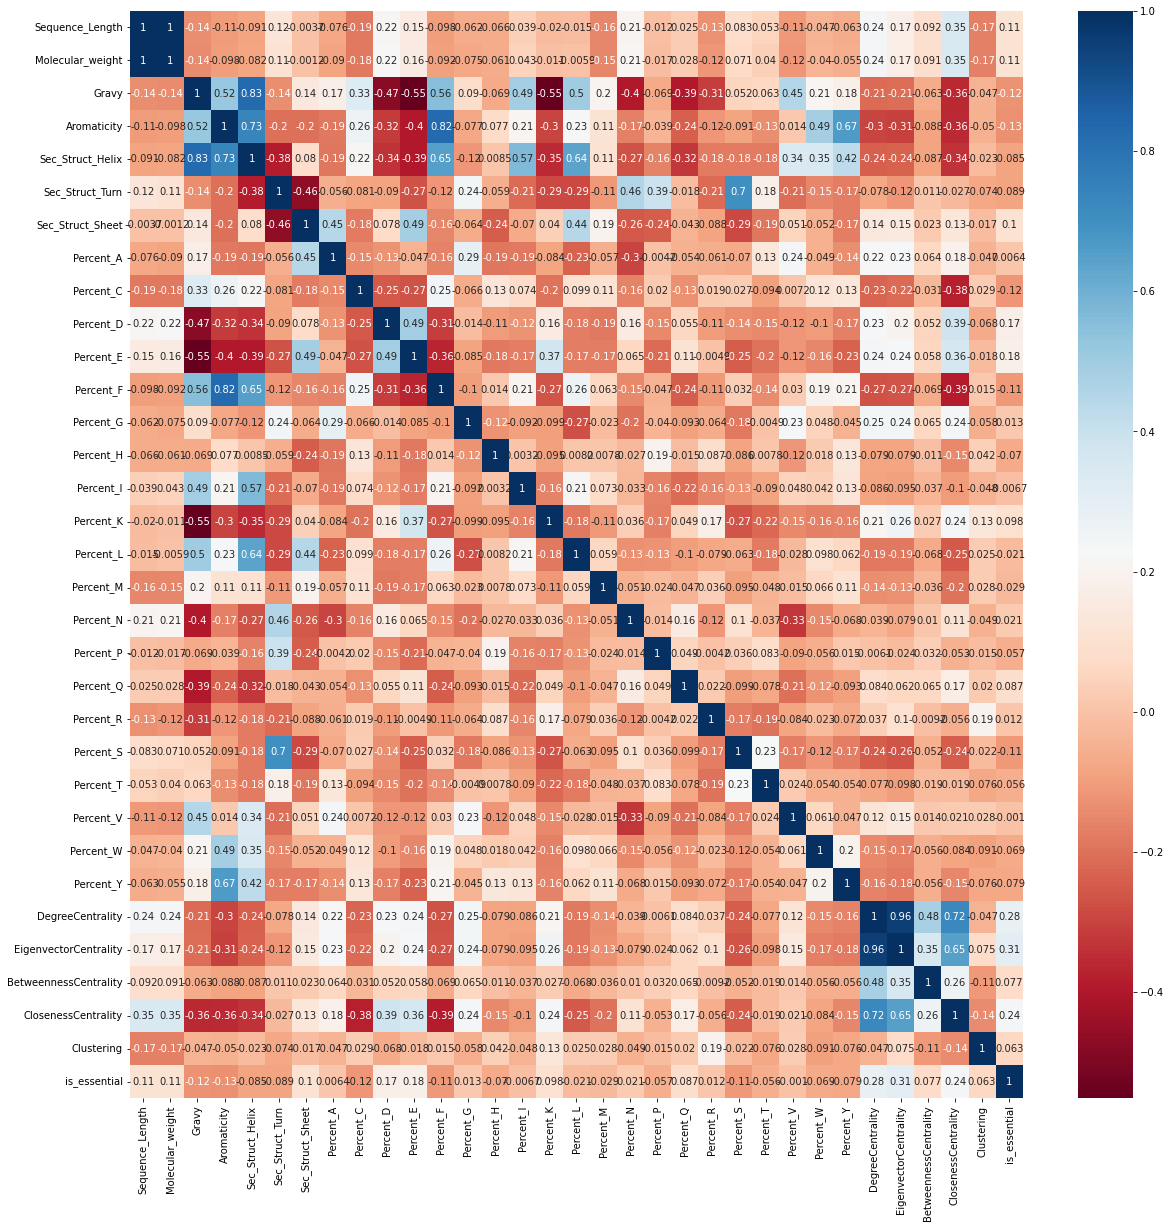

In [11]:
# Matriz de Correlação com Matplotlib Seaborn incluindo a classe de predição
plt.rcParams["figure.figsize"] = (20,20)

sns.heatmap(df.corr(), annot=True, cmap='RdBu');

## Seleção de Atributos

In [32]:
# Eliminação das colunas de nome e id da espécie

Attr = df.drop(['Locus', 'Sequence', 'is_essential', 'Protein_key', 'Gravy'], axis=1)
y = df['is_essential']

In [33]:
np.array(Attr.columns)

array(['Sequence_Length', 'Molecular_weight', 'Aromaticity',
       'Sec_Struct_Helix', 'Sec_Struct_Turn', 'Sec_Struct_Sheet',
       'Percent_A', 'Percent_C', 'Percent_D', 'Percent_E', 'Percent_F',
       'Percent_G', 'Percent_H', 'Percent_I', 'Percent_K', 'Percent_L',
       'Percent_M', 'Percent_N', 'Percent_P', 'Percent_Q', 'Percent_R',
       'Percent_S', 'Percent_T', 'Percent_V', 'Percent_W', 'Percent_Y',
       'DegreeCentrality', 'EigenvectorCentrality',
       'BetweennessCentrality', 'ClosenessCentrality', 'Clustering'],
      dtype=object)

In [94]:
# Função para seleção de atributos
best_var = SelectKBest(score_func=chi2, k=20)
feature = np.array(Attr.columns)

# Executa a função de pontuação em (X, Y) e obtém os atributos selecionados
fit = best_var.fit(Attr, y)
filter = best_var.get_support()

# Reduz X para os atributos selecionados
features_data = fit.transform(Attr)

# Resultados
print('\nNúmero original de atributos:', Attr.shape[1])
print('\nNúmero reduzido de atributos:', features_data.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", df.columns[0:31])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas): plas, test, mass e age.
# (Basta mapear manualmente o índice dos nomes dos respectivos atributos)
set_printoptions(precision=3) # 3 casas decimais
print(fit.scores_)

# Imprime o dataset apenas com as colunas selecionadas

print("Selected best 20:")
print(feature[filter])

selected_attr = feature[filter]


Número original de atributos: 31

Número reduzido de atributos: 20

Atributos Originais: Index(['Locus', 'Sequence', 'Sequence_Length', 'Molecular_weight', 'Gravy',
       'Aromaticity', 'Sec_Struct_Helix', 'Sec_Struct_Turn',
       'Sec_Struct_Sheet', 'Percent_A', 'Percent_C', 'Percent_D', 'Percent_E',
       'Percent_F', 'Percent_G', 'Percent_H', 'Percent_I', 'Percent_K',
       'Percent_L', 'Percent_M', 'Percent_N', 'Percent_P', 'Percent_Q',
       'Percent_R', 'Percent_S', 'Percent_T', 'Percent_V', 'Percent_W',
       'Percent_Y', 'Protein_key', 'DegreeCentrality'],
      dtype='object')
[2.377e+04 2.767e+06 1.379e+00 5.522e-01 4.636e-01 4.383e-01 3.075e-03
 1.156e+00 1.635e+00 2.360e+00 9.075e-01 1.134e-02 2.606e-01 1.887e-03
 7.133e-01 2.128e-02 3.345e-02 2.570e-02 1.654e-01 4.954e-01 9.193e-03
 1.100e+00 1.628e-01 4.744e-05 2.218e-01 2.967e-01 1.805e+01 5.678e+00
 6.950e-02 1.415e+00 1.528e+00]
Selected best 20:
['Sequence_Length' 'Molecular_weight' 'Aromaticity' 'Sec_Struct_He

In [95]:
df_select = df[selected_attr]
df_select

,Sequence_Length,Molecular_weight,Aromaticity,Sec_Struct_Helix,Sec_Struct_Turn,Sec_Struct_Sheet,Percent_C,Percent_D,Percent_E,Percent_F,Percent_H,Percent_K,Percent_Q,Percent_S,Percent_W,Percent_Y,DegreeCentrality,EigenvectorCentrality,ClosenessCentrality,Clustering
0,156,18434.5023,0.096154,0.288462,0.211538,0.185897,0.006410,0.128205,0.044872,0.025641,0.032051,0.096154,0.012821,0.057692,0.032051,0.038462,0.001095,0.000283,0.427912,0.238095
1,143,15900.5720,0.111888,0.307692,0.244755,0.237762,0.006993,0.083916,0.069930,0.055944,0.006993,0.076923,0.006993,0.111888,0.006993,0.048951,0.077272,0.014476,0.506938,0.269547
2,719,79414.9726,0.043115,0.219750,0.326843,0.214186,0.002782,0.058414,0.047288,0.020862,0.022253,0.057024,0.050070,0.112656,0.004172,0.018081,0.025966,0.003505,0.480713,0.256736
3,220,24990.2165,0.109091,0.318182,0.195455,0.236364,0.013636,0.063636,0.063636,0.054545,0.022727,0.081818,0.050000,0.027273,0.013636,0.040909,0.104802,0.022483,0.515066,0.261009
4,825,94596.1505,0.100606,0.335758,0.244848,0.225455,0.010909,0.042424,0.066667,0.054545,0.019394,0.071515,0.046061,0.081212,0.002424,0.043636,0.037385,0.006114,0.491542,0.188671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6296,215,25286.2995,0.111628,0.395349,0.153488,0.260465,0.009302,0.046512,0.093023,0.065116,0.013953,0.134884,0.041860,0.079070,0.009302,0.037209,0.027530,0.003384,0.484171,0.205455
6297,1306,133113.0554,0.060490,0.222818,0.411179,0.178407,0.001531,0.033691,0.033691,0.030628,0.006126,0.012251,0.052067,0.290199,0.004594,0.025268,0.030502,0.003781,0.485274,0.259212
6298,633,71735.0271,0.164297,0.391785,0.246445,0.227488,0.025276,0.034755,0.037915,0.077409,0.017378,0.045814,0.023697,0.101106,0.034755,0.052133,0.038792,0.004369,0.487494,0.160409
6299,567,62930.7446,0.142857,0.391534,0.248677,0.238095,0.024691,0.024691,0.049383,0.074074,0.010582,0.052910,0.024691,0.081129,0.022928,0.045855,0.020648,0.001266,0.464844,0.220449


## Pré-processamento de Dados

In [137]:
# Separação em conjuntos de treino e teste
X = df.drop(['Protein_key','is_essential', 'Locus', 'Sequence'], axis=1)
#X = df_select
y = df['is_essential']
test_size = 0.3
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=seed,
                                                    shuffle=True, 
                                                    stratify=y)

In [138]:
## Undersampling

undersample = RandomUnderSampler()

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

y_train_under.value_counts()

0    770
1    770
Name: is_essential, dtype: int64

In [139]:
## Oversampling
oversample = SMOTE()

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

y_train_smote.value_counts()

0    3640
1    3640
Name: is_essential, dtype: int64

In [140]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_train = scaler.fit_transform(X_train_smote)
print(scaled_train)

[[8.964e-02 8.846e-02 6.098e-01 ... 1.251e-02 7.376e-01 2.305e-01]
 [1.944e-02 1.940e-02 8.272e-01 ... 6.542e-07 2.777e-01 0.000e+00]
 [8.453e-02 8.385e-02 5.199e-01 ... 1.501e-03 6.690e-01 2.694e-01]
 ...
 [2.374e-02 2.358e-02 6.208e-01 ... 6.246e-03 7.408e-01 2.852e-01]
 [3.664e-02 3.699e-02 6.230e-01 ... 7.758e-03 6.901e-01 2.143e-01]
 [3.000e-01 3.037e-01 4.390e-01 ... 1.771e-02 7.796e-01 2.780e-01]]


In [141]:
n_features = scaled_train.shape[1]
n_features

32

## Algoritmo XGBoost

In [146]:
clf = XGBClassifier(n_estimators = 100,
                    max_depth = 6, 
                    learning_rate = 0.4,
                    random_state=7)

# Training the XGB classifier
clf.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, ...)

In [147]:
y_pred = clf.predict(X_test)

In [148]:
# Scikit-learn
print(confusion_matrix(y_test, y_pred))

[[1299  262]
 [ 184  146]]


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1561
           1       0.36      0.44      0.40       330

    accuracy                           0.76      1891
   macro avg       0.62      0.64      0.62      1891
weighted avg       0.79      0.76      0.77      1891

